In [1]:
%pip install --user --upgrade "opencv-python"
%pip install --upgrade pytesseract

import cv2
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import image_utils

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
IMAGE = 'test-images/KJ Desktop.png'
purple = (200, 0, 200)
plt.rcParams['figure.dpi'] = 150
print(datetime.today())

2023-04-05 20:17:03.035043




test-images/KJ Desktop.png
Start Time: 1680740243.17
Image Size: 218040. Ratio of std color counts to size: 26.76.
Image type: screen_cap
Tesseract config: --psm 10 --oem 0 -l eng -c tessedit_char_whitelist=123456789 --tessdata-dir ./tessdata/4.00_Nov_2016

Image width: 460
Image height: 474
Minimum side: 460
Minimum line length: 230
Max line gap: 9

Threshold: 230
Horizontal lines: 18
Vertical lines: 19
Rejected lines: 0
x coords before refactoring: [[12, 59], [61, 108], [110, 155], [159, 206], [208, 255], [257, 303], [307, 353], [355, 402], [405, 450]]
y coords before refactoring: [[14, 60], [63, 111], [113, 160], [164, 211], [214, 311], [315, 362], [365, 462]]
Refactor y coordinates
Coordinate widths histogram for refactoring:
(array([5, 0, 0, 0, 0, 0, 0, 0, 0, 2]), array([46. , 51.1, 56.2, 61.3, 66.4, 71.5, 76.6, 81.7, 86.8, 91.9, 97. ]))
Min width: 39.1, Max width: 56.21000000000001
Refactor x coordinates
Coordinate widths histogram for refactoring:
(array([2, 0, 0, 0, 0, 2, 0, 

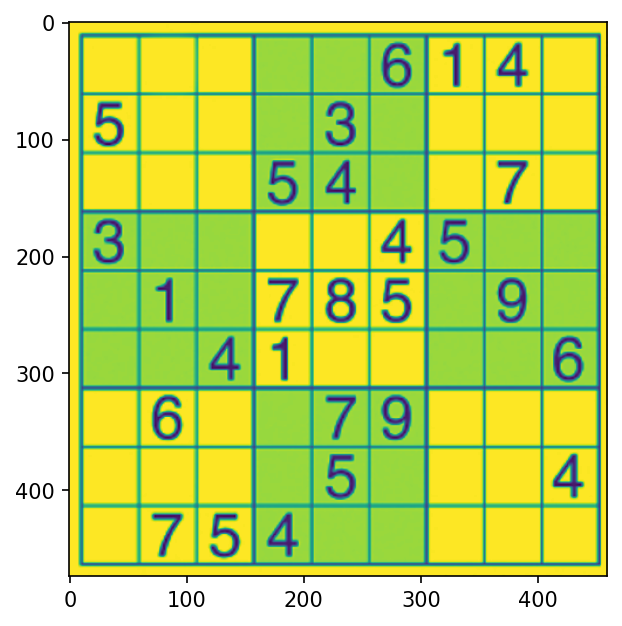

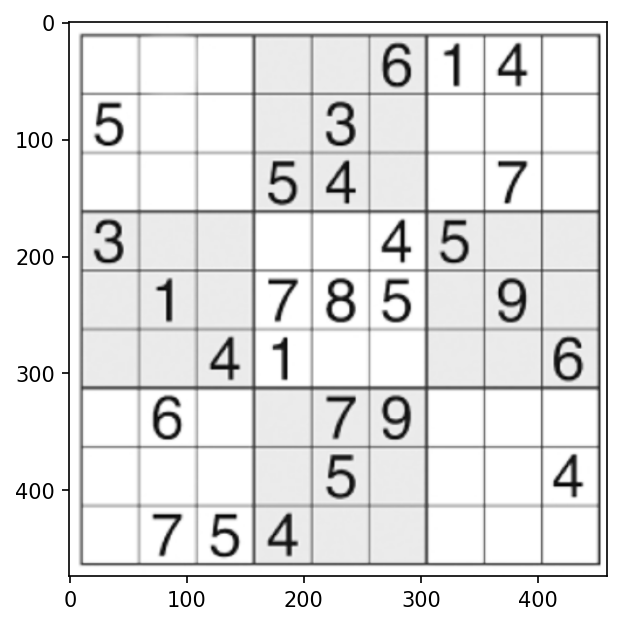

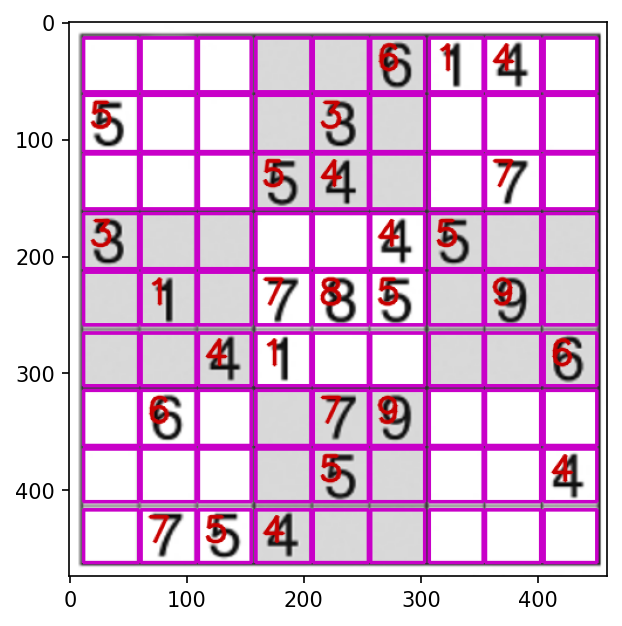

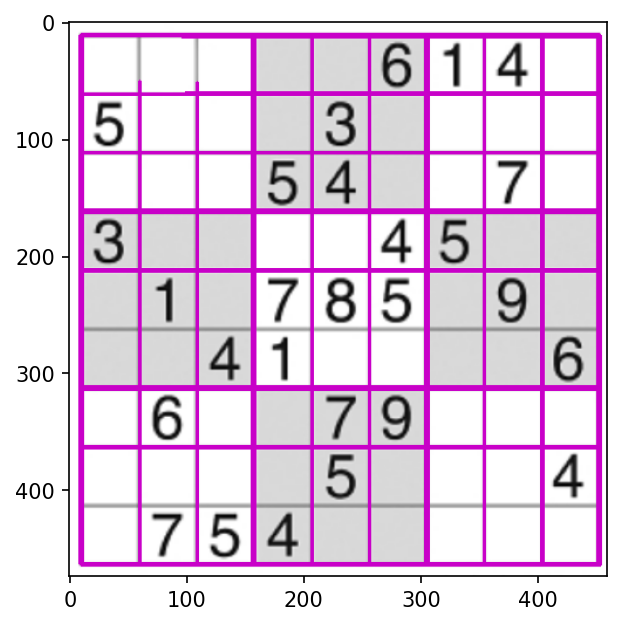

In [3]:
full_file_path = os.path.join(os.getcwd(), IMAGE)
matrix_image = cv2.imread(full_file_path, cv2.IMREAD_GRAYSCALE)
if matrix_image is None:
    print('File \'%s\' is not an image.' % IMAGE)
else:
    print('\n\n%s' % IMAGE)
    input_matrix, image_with_ocr, image_with_lines, coordinates = image_utils.extract_matrix_from_image(matrix_image)
    image_utils.show_image(matrix_image)    
    image_utils.show_image(image_with_ocr)
    image_utils.show_image(image_with_lines)

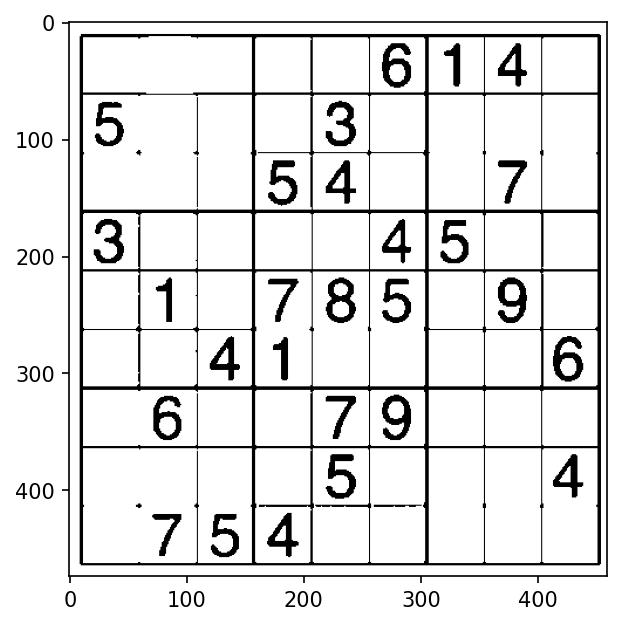

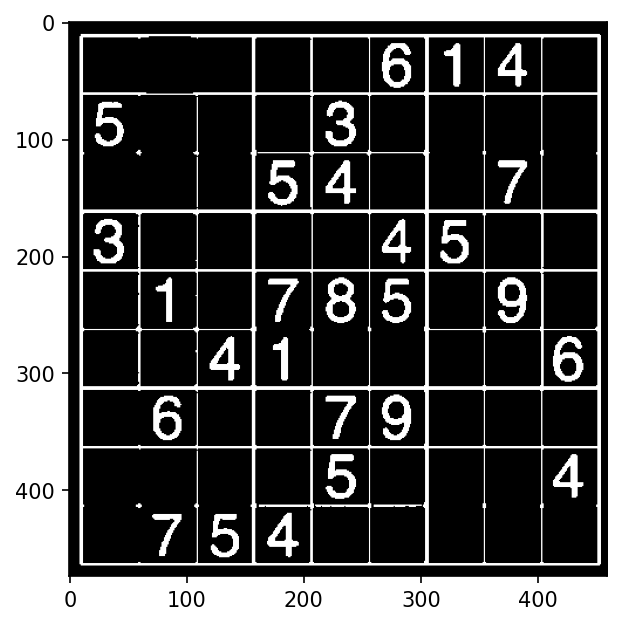

In [6]:
bw_threshold = 150
(thresh, monochrome_image) = cv2.threshold(matrix_image, bw_threshold, 1, cv2.THRESH_BINARY)
(thresh, inv_monochrome_image) = cv2.threshold(matrix_image, bw_threshold, 1, cv2.THRESH_BINARY_INV)

image_utils.show_image(monochrome_image)
image_utils.show_image(inv_monochrome_image)

Start Time: 1680719126.90
Image Size: 218040. Ratio of std color counts to size: 51.32.
Image type: screen_cap
Tesseract config: --psm 10 --oem 0 -l eng -c tessedit_char_whitelist=123456789 --tessdata-dir ./tessdata/4.00_Nov_2016

Image width: 460
Image height: 474
Minimum side: 460
Minimum line length: 230
Max line gap: 9

Threshold: 230
Horizontal lines: 0
Vertical lines: 0
Rejected lines: 380

Threshold: 230
Horizontal lines: 0
Vertical lines: 0
Rejected lines: 380
x coords before refactoring: []
y coords before refactoring: []
Refactor y coordinates
Refactor x coordinates
x coords after refactoring: []
y coords after refactoring: []
Starting 123145562615808 - blur: 5, threshold: 66
Starting 123145579405312 - blur: 5, threshold: 83
Starting 123145596194816 - blur: 5, threshold: 200
Ending 123145562615808 - blur: 5, threshold: 66. Elapsed time: 0.00
Ending 123145596194816 - blur: 5, threshold: 200. Elapsed time: 0.00
Ending 123145579405312 - blur: 5, threshold: 83. Elapsed time: 0.00

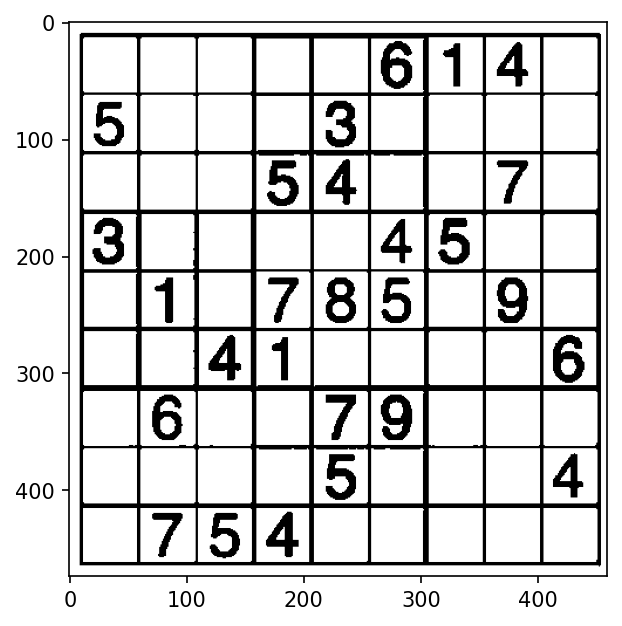

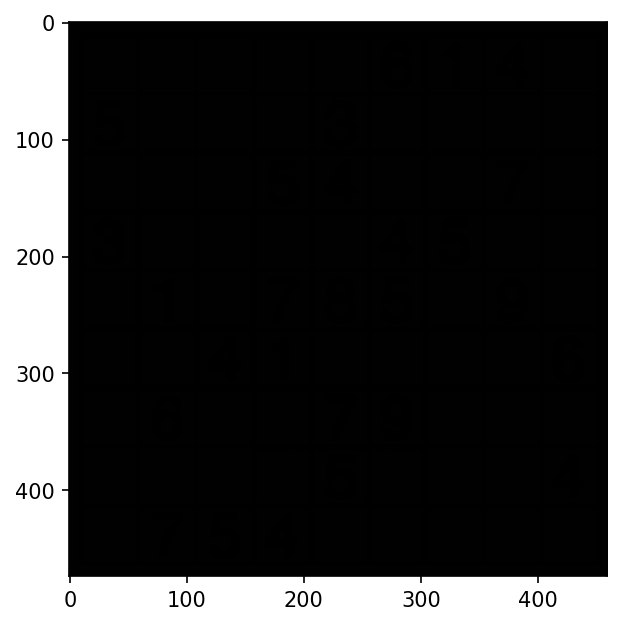

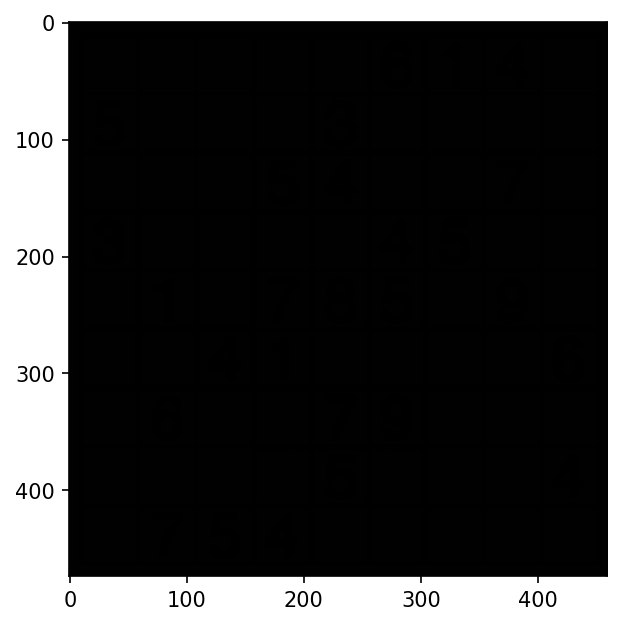

In [5]:
input_matrix, image_with_ocr, image_with_lines, coordinates = image_utils.extract_matrix_from_image(monochrome_image)
image_utils.show_image(monochrome_image)
image_utils.show_image(image_with_ocr)
image_utils.show_image(image_with_lines)

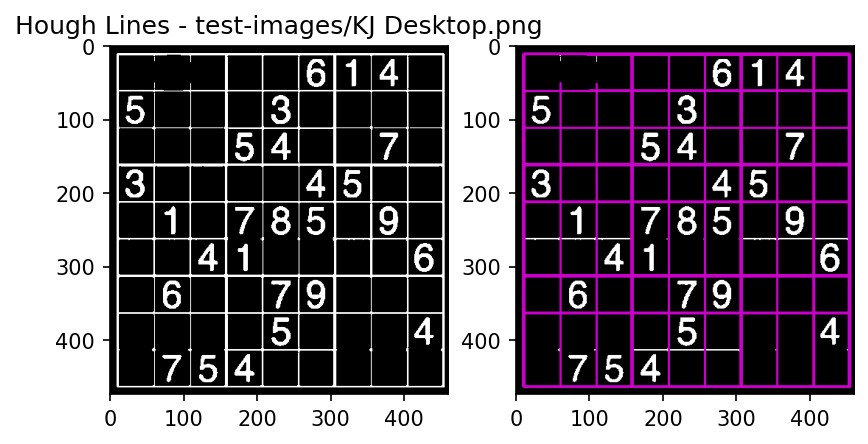

In [6]:
inverted_image = image_utils.invert_image(matrix_image)
shape = inverted_image.shape
image_height = shape[0]
image_width = shape[1]
minimum_side = min(image_height, image_width)
min_line_length = int(minimum_side / 2)
max_line_gap = int(minimum_side / 100)
threshold = int(minimum_side * 0.5)
lines = cv2.HoughLinesP(inverted_image, 1, np.pi / 180, threshold=threshold, minLineLength=min_line_length,
                        maxLineGap=max_line_gap)
inverted_lines_image = image_utils.generate_image_with_lines(inverted_image, lines, purple)
plt.subplot(1, 2, 1)
plt.imshow(inverted_image, cmap='Greys_r')
plt.title('Hough Lines - %s' % IMAGE)
plt.subplot(1, 2, 2)
plt.imshow(inverted_lines_image)
plt.show()